In [45]:
import networkx as ntx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

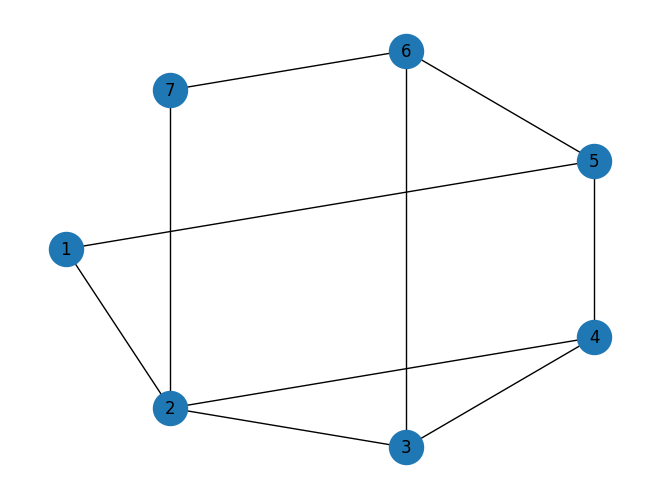

In [46]:
simple_graph = ntx.Graph()
simple_graph.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), 
                             (6, 7), (2, 7), (3, 6), (1, 5), (2, 4)])

pos = ntx.shell_layout(simple_graph)
ntx.draw(simple_graph, pos, with_labels = True, node_size = 600)
plt.show()

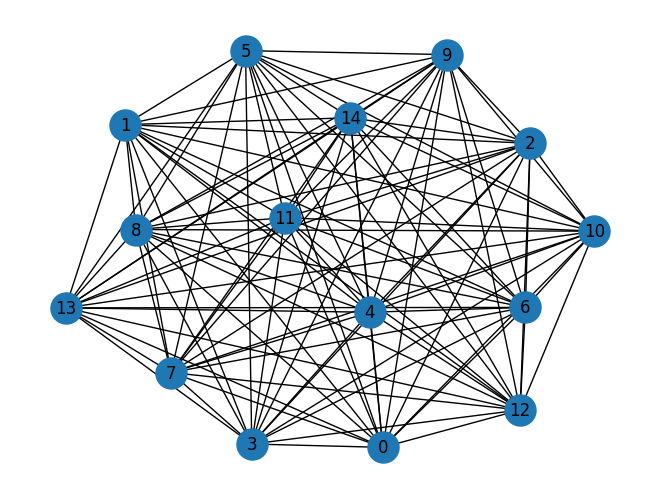

In [47]:
complete_Graph = ntx.complete_graph(15)

ntx.draw(complete_Graph, with_labels = True, node_size = 500)

Graph is bipartite!


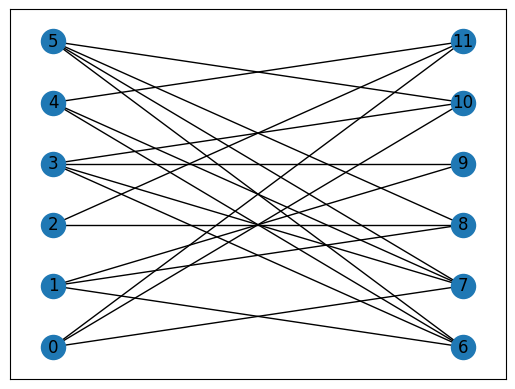

In [48]:
bpGraph = ntx.Graph()

bpGraph.add_nodes_from(["0", "1", "2", "3", "4", "5"], bipartite = 0)
bpGraph.add_nodes_from(["6", "7", "8", "9", "10", "11"], bipartite = 1)

bpGraph.add_edges_from([("0", "7"), ("0", "11"), ("0", "10"), 
                        ("1", "8"), ("1", "6"), ("1", "9"),
                        ("2", "11"), ("2", "8"),
                        ("3", "6"), ("3", "9"), ("3", "10"), ("3", "7"),
                        ("4", "11"), ("4", "7"), ("4", "6"),
                        ("5", "6"), ("5", "8"), ("5", "10"), ("5", "7")])

if bipartite.is_bipartite(bpGraph):
    print("Graph is bipartite!")
else:
    print("Graph is not bipartite")

pos = ntx.drawing.layout.bipartite_layout(bpGraph, ['0','1','2', '3', '4', '5'])
ntx.draw_networkx(bpGraph, pos, width = 1)

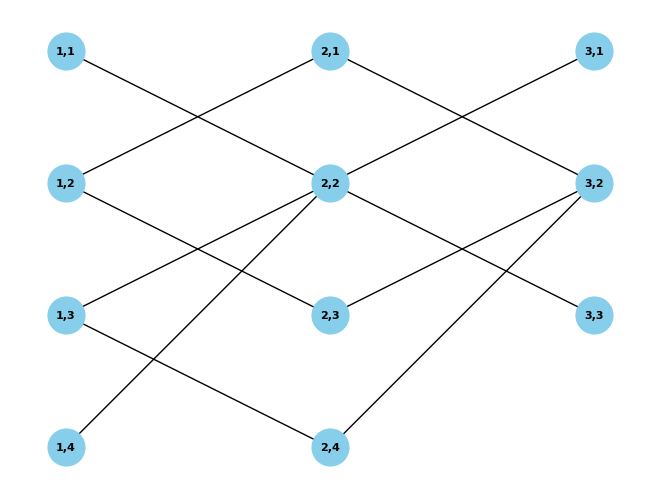

In [49]:
## Tripartite Graph
set1 = {'1,1', '1,2', '1,3', '1,4'}
set2 = {'2,1', '2,2', '2,3', '2,4'}
set3 = {'3,1', '3,2', '3,3'}

G = ntx.Graph()

G.add_nodes_from(set1, bipartite=0)  # 0 represents the first set
G.add_nodes_from(set2, bipartite=1)  # 1 represents the second set
G.add_nodes_from(set3, bipartite=2)  # 2 represents the third set

edges = [('1,1', '2,2'), ('1,2', '2,1'), ('1,2', '2,3'), ('1,3', '2,2'),
         ('2,1', '3,2'), ('2,2', '3,1'), ('2,2', '3,3'), ('2,3', '3,2'),
         ('1,4', '2,2'), ('2,4', '1,3'), ('2,4', '3,2')]

G.add_edges_from(edges)

pos = {'1,1': (0, 1), '1,2': (0, 0), '1,3': (0, -1), '1,4': (0, -2),
       '2,1': (1, 1), '2,2': (1, 0), '2,3': (1, -1), '2,4': (1, -2),
       '3,1': (2, 1), '3,2': (2, 0), '3,3': (2, -1)}
ntx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700,
         node_color='skyblue', font_color='black', font_size=8)

plt.show()

In [50]:
def obtain_degree_sequence(G):
    degree_sequence = sorted([d for _, d in G.degree()], reverse=True)
    return degree_sequence

def checkAllZeros(list):
    if len(list) == 0:
        return True
    for i in list:
        if(i != 0):
            return False
    return True

def havelHakimi(degree_Sequence):
    degree_Sequence.sort(reverse = True)
    while(checkAllZeros(degree_Sequence) == False):
        largest = degree_Sequence[0]
        if(largest >= len(degree_Sequence)):
            return False
        degree_Sequence[0] = 0
        for i in range(1, largest+1, 1):
            if degree_Sequence[i] == 0:
                return False
            degree_Sequence[i] -= 1
        degree_Sequence.sort(reverse = True)
    
    # If it reaches this point, it means all degrees have been 
    # reduced to 0 and therefore havel hakimi theorem has passed
    return True

A simple graph can be drawn with these degree sequence
[4, 3, 3, 3, 3, 2, 2]


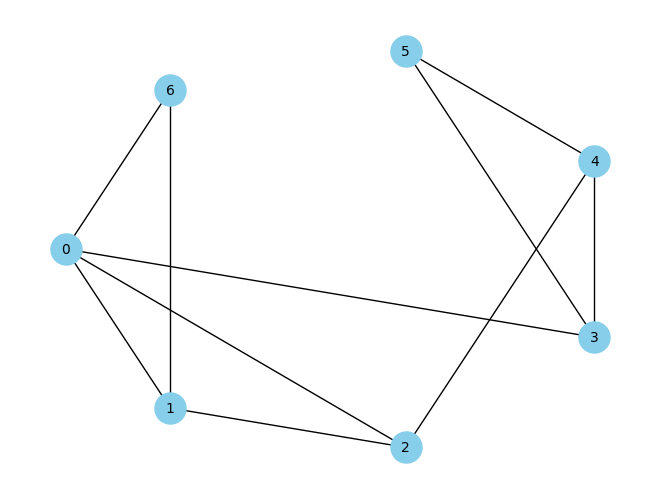

In [51]:
degree_Sequence = obtain_degree_sequence(simple_graph)

parameter_degree_sequence = degree_Sequence.copy()
if(havelHakimi(parameter_degree_sequence)):
    print("A simple graph can be drawn with these degree sequence")
    print(degree_Sequence)
    G = ntx.random_degree_sequence_graph(degree_Sequence)
    pos = ntx.shell_layout(G)
    ntx.draw(G, pos, with_labels=True, node_size=500,
             node_color='skyblue', font_color='black', font_size=10)
else:
    print("A simple graph cannot be drawn with the given degree sequence")

In [52]:
degree_Sequence = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
parameter_degree_sequence = degree_Sequence.copy()
if(havelHakimi(parameter_degree_sequence)):
    print("A simple graph can be drawn with these degree sequence")
    G = ntx.random_degree_sequence_graph(degree_Sequence)
    pos = ntx.shell_layout(G)
    ntx.draw(G, pos, with_labels=True, node_size=500,
             node_color='skyblue', font_color='black', font_size=10)
else:
    print("A simple graph cannot be drawn with the given degree sequence")

A simple graph cannot be drawn with the given degree sequence
